# Exploratory Data Analysis

## Importing Libraries and Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv


In [2]:
#Importing data
data = pd.read_csv('../input/500-person-gender-height-weight-bodymassindex/500_Person_Gender_Height_Weight_Index.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


## Reviewing Data

We need to see if the data set is complete with valid entries. This means checking if there are:
 - any null value entries
 - an equal number of entries for all features (columns)

In [3]:
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

This means we have no null values in the data. Next we want to check:
 - what features we are working with
 - how much data there is

In [4]:
#Seeing what columns we have, what the data types there are, 
#and what number of entries per column we have.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


This tells us that there are 4 feature columns - `Gender`, `Height`, `Weight`, and `Index` (BMI Index). 

Knowing that BMI is a calculated value, we can say that the variables we will be working with are `Gender`,`Height`, and `Weight`.

We can verify this with the data description given to us:

>Gender : Male / Female

>Height : Number (cm)

> Weight : Number (Kg)

>Index :
0 - Extremely Weak, 1 - Weak, 2 - Normal, 3 - Overweight, 4 - Obesity, 5 - Extreme Obesity

## Data Visualization

Now we can start looking for trends in the data.

We can first check the distribution of data

In [5]:
# Set default plot grid
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Histogram of Index')

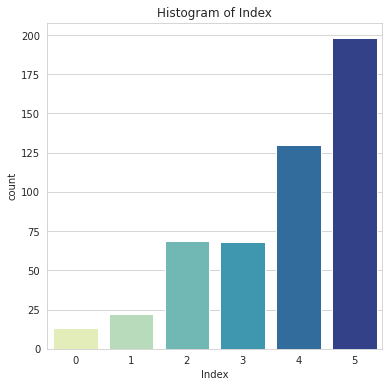

In [6]:
# Index Historgram: Frequency of values falling under each Index [0,1,2,3,4,5]
plt.rcParams['figure.figsize'] = (6, 6)
sns.countplot(data['Index'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Index")

Text(0.5, 1.0, 'Histogram of Height')

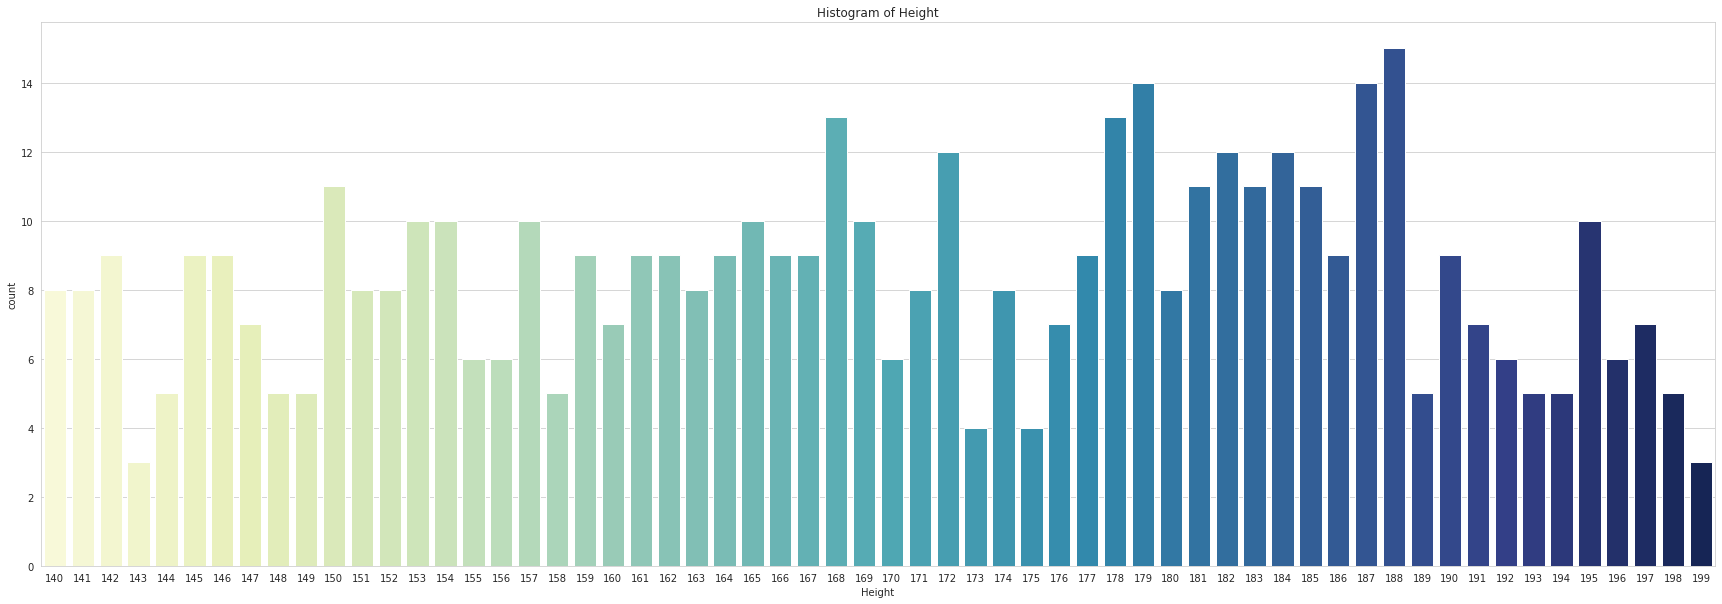

In [7]:
# Height Historgram: Frequency of values falling under certain height intervals
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(data['Height'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Height")

Text(0.5, 1.0, 'Histogram of Weight')

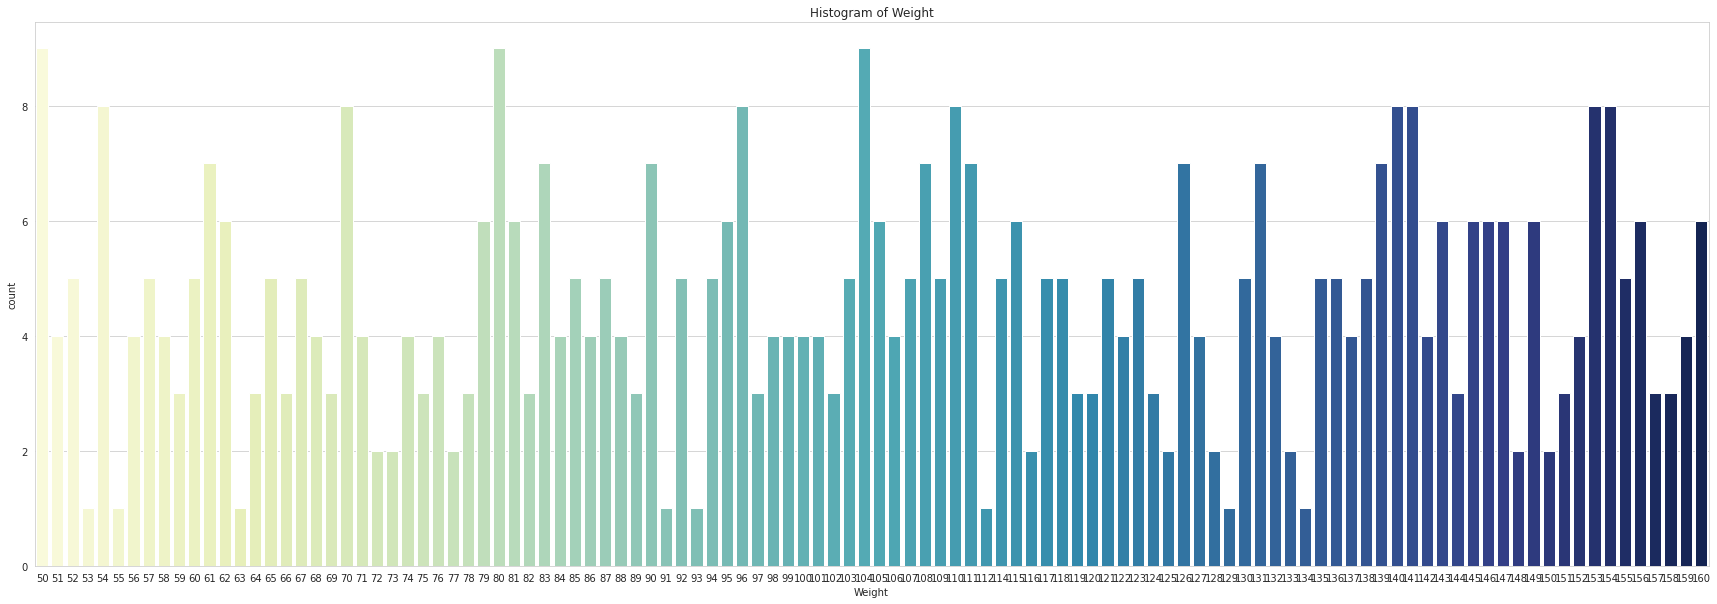

In [8]:
# Weight Historgram: Frequency of values falling under certain weight intervals
plt.rcParams['figure.figsize'] = (30, 10)
sns.countplot(data['Weight'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Weight")

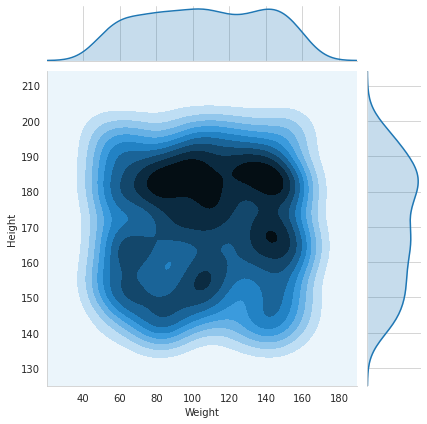

In [9]:
# Plot relation between weight and height
sns.jointplot(x='Weight', y='Height', data=data, kind='kde')

Text(0.5, 1.0, 'Height Vs Weight Data Grouped by Gender')

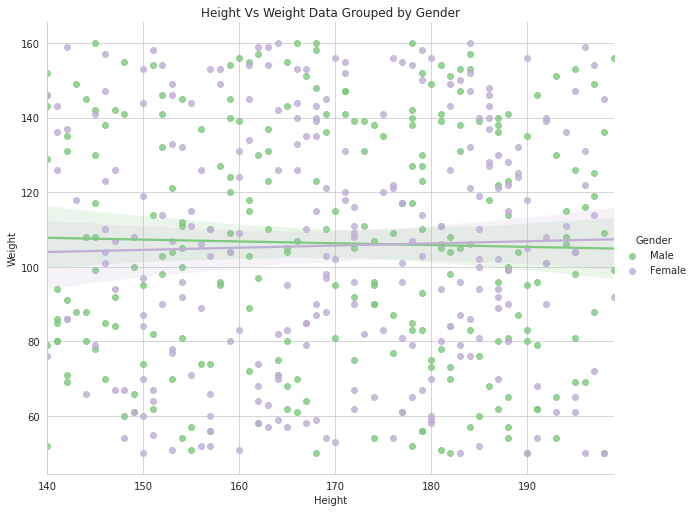

In [10]:
# Trend in Gender based on relationship between Height and Weight
sns.lmplot(x='Height', y='Weight', hue='Gender', data=data,
           fit_reg=True, height=7, aspect=1.25, palette = "Accent")
ax = plt.gca()
ax.set_title("Height Vs Weight Data Grouped by Gender")

The distribution of height vs weight does not follow any trends when categorized by gender.

So, we can hypothesize that gender does not affect the index/BMI value significantly.

Text(0.5, 1.0, 'Height Vs Weight Data Grouped by Index')

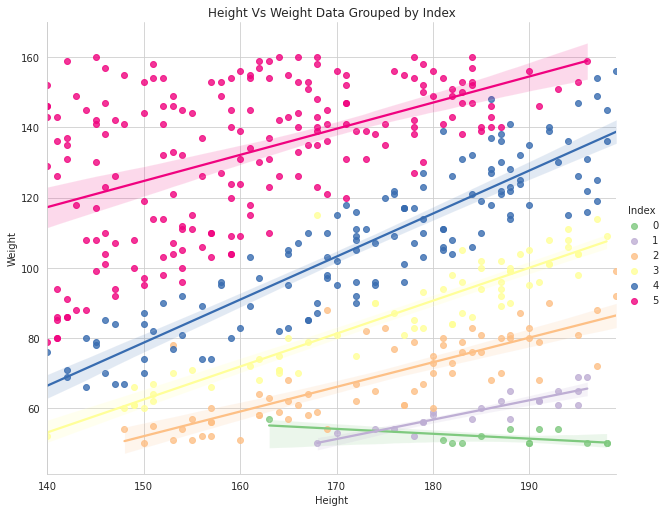

In [11]:
# Trend in Index based on relationship between Height and Weight 
sns.lmplot(x='Height', y='Weight', hue='Index', data=data,
           fit_reg=True, height=7, aspect=1.25, palette='Accent')
ax = plt.gca()
ax.set_title("Height Vs Weight Data Grouped by Index")

We can make out distinct bands in the data based on the index value.

So, there is a general positive correlation between height and weight when categorized by index value.

Now, let us see if there are any discrepencies in the relation when looking at each gender separately.

In [12]:
# Segregate data based on whether the gender is Male or Female
male_data = data[data['Gender']=='Male']
female_data = data[data['Gender']=='Female']

Text(0.5, 1.0, 'Female Height Vs Weight Data Grouped by Index')

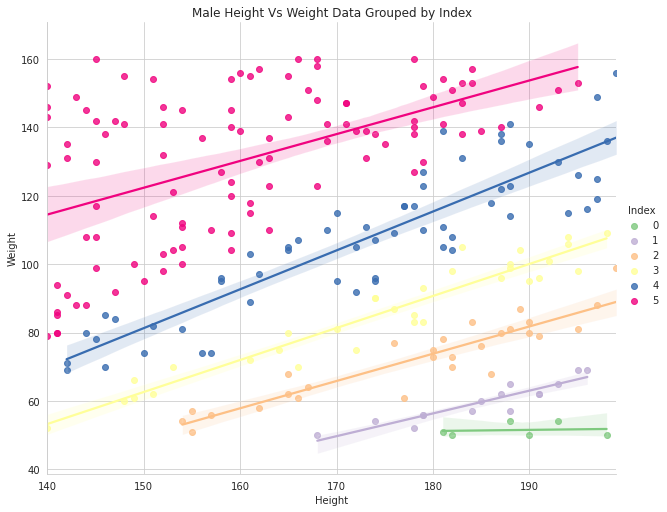

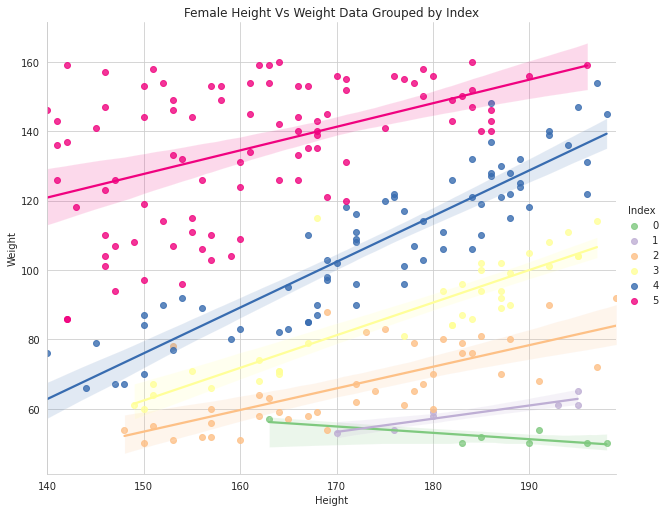

In [13]:
# Trend in Index based on relationship between Height and Weight 
male_data = data[data['Gender']=='Male']
female_data = data[data['Gender']=='Female']
sns.lmplot(x='Height', y='Weight', hue='Index', data=male_data,
           fit_reg=True, height=7, aspect=1.25,palette='Accent')
ax = plt.gca()
ax.set_title("Male Height Vs Weight Data Grouped by Index")

sns.lmplot(x='Height', y='Weight', hue='Index', data=female_data,
           fit_reg=True, height=7, aspect=1.25,palette='Accent')
ax = plt.gca()
ax.set_title("Female Height Vs Weight Data Grouped by Index")

We can also see if there are any correlation in the data by producing correlation matrices.

In [14]:
# Gives us basic correlation index for numerical variables
data.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


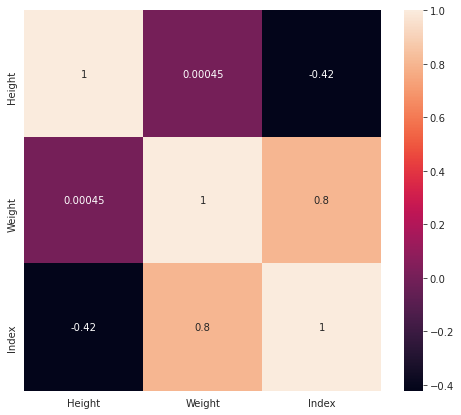

In [15]:
# Provides visual context for correlations via color scale
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(data.corr(), annot=True)

Once again, let's see if this changes for people of different genders.

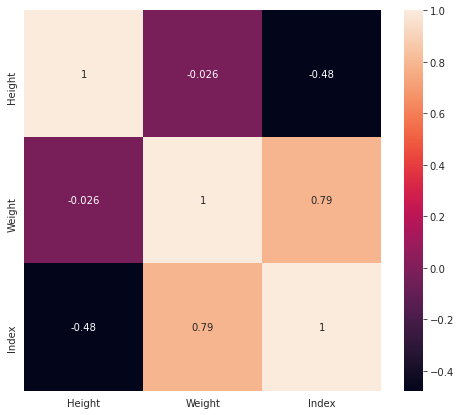

In [16]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(male_data.corr(), annot=True)

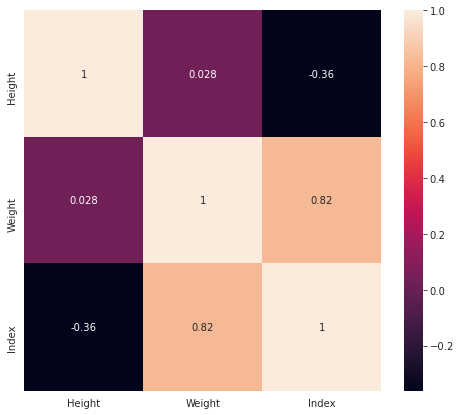

In [17]:
plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(female_data.corr(), annot=True)

## Processing Data

Before moving on to creating the predictive model, we need to find a way to include our non-numeric variable which is the Gender.
Even though we found that it does not 

Knowing gender is a categorical value (Male/Female based on the data description) we need to encode the data for Gender to make it useable.

There are 2 ways we can do this:
 - Ordinal Encoding:
     - Assign arbitrary numbers such as 1 to `Female` and 0 to `Male` (similar to a Boolean/Truth value) to differentiate them
     - End up with one new column with number values from 0 to n representing n unique values
 - One-Hot Encoding:
     - Create dummy variables, where we produce new columns for `Female` and `Male` and have binary values (0 or 1) for each of them
     - End up with n new columns representing n unique values, but we only use n-1 of these columns dropping the last one as it ends up being redundant in nature

In [18]:
# Ordinal Encoding
data["Gender"] = data["Gender"].astype('category')
data["Gender_Enc"] = data["Gender"].cat.codes
data.head()


,Gender,Height,Weight,Index,Gender_Enc
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1


In [19]:
# One Hot Encoding
dummies = pd.get_dummies(data['Gender'])
data = data.join(dummies)
data.head()

,Gender,Height,Weight,Index,Gender_Enc,Female,Male
0,Male,174,96,4,1,0,1
1,Male,189,87,2,1,0,1
2,Female,185,110,4,0,1,0
3,Female,195,104,3,0,1,0
4,Male,149,61,3,1,0,1


Here we can see that the results from Ordinal Encoding and One-Hot Encoding are very similar.

The new column `Male` from One-Hot Encoding is the same as the column `Gender_Enc` from Ordinal Encoding.  <br />
This happens to be the case since we are working with the categorical variable `Gender` which only has two exclusive values in the data.

So, for this case it does not matter which encoded values for `Gender` we use.

In [20]:
# Dropping last two columns with dummy values from one-hot encoding as they are redundant
data = data.drop(columns=['Male', 'Female'], axis=1)
data.head()

,Gender,Height,Weight,Index,Gender_Enc
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1


## Building Model

For making our predictive model we will need to proceed with certain steps:
 - Assign our data instances and target value (X and y columns)
 - Split data into training and test sets
 - Train our model
 - Test and evaluate the model

### Prepare Data

Since we want to predict what Index a person would be assigned based on their height, weight, and gender we will be making `Index` our target value or y. <br>
So, this makes our features `Height`, `Weight`, and `Gender_Enc` or X. <br>

In [21]:
# Select columns to add to X and y sets
features = list(data.columns.values)
features.remove('Gender')
features.remove('Index')
X = data[features]
y = data['Index']

Next we split the X and y data between the training set and testing set.

In [22]:
# Import additional required libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [23]:
# Import required class from sklearn library
from sklearn.model_selection import train_test_split

# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

### Train Model

Here we will introduce our model and train it to fit the data we give it. <br>
We will be using the k-nearest neighbours algorithm first.

In [24]:
# Import required class from sklearn library
from sklearn.neighbors import KNeighborsClassifier

# Fit k-nearest neighbors classifier with training sets for n = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Test and Evaluate Model

To test our model, we will:
 - Run and compare the models predictions to the real values using `X_test` and `y_test`
 - Produce a confusion matrix and classification report
 - Get mean accuracy scores and error rate for the model

In [25]:
# Run a prediction
y_pred = knn.predict(X_test)

In [26]:
# Import remaining required classes from sklearn
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [27]:
#Get confusion matrix
print(confusion_matrix(y_test,y_pred))

[[ 3  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0 10  2  0  0]
 [ 0  0  4 11  3  0]
 [ 0  0  0  1 34  3]
 [ 0  0  0  0  2 48]]


In [28]:
# Get classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       0.71      0.83      0.77        12
           3       0.79      0.61      0.69        18
           4       0.87      0.89      0.88        38
           5       0.94      0.96      0.95        50

    accuracy                           0.88       125
   macro avg       0.89      0.88      0.88       125
weighted avg       0.88      0.88      0.88       125



In [29]:
# Get accuracy score
score = np.mean(y_pred == y_test)
print(score)

0.88


In [30]:
# Get error rate
error = np.mean(y_pred != y_test)
print(error)

0.12


Let's compare the results of the predictor to the actual values using a plot.

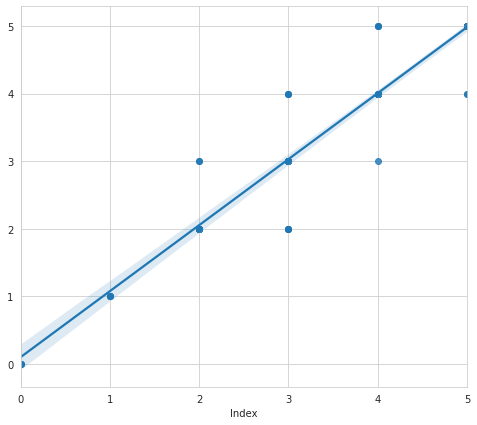

In [31]:
sns.regplot(x=y_test, y=y_pred)

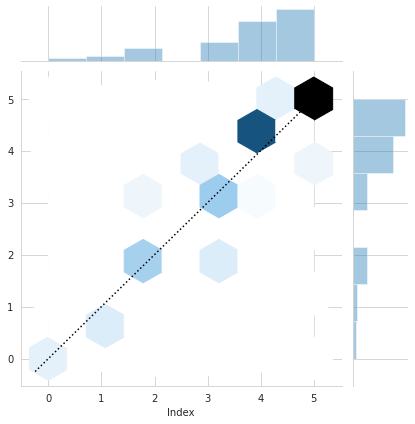

In [32]:
fig = sns.jointplot(x=y_test, y=y_pred, kind='hex')
x0, x1 = fig.ax_joint.get_xlim()
y0, y1 = fig.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
fig.ax_joint.plot(lims, lims, ':k')    

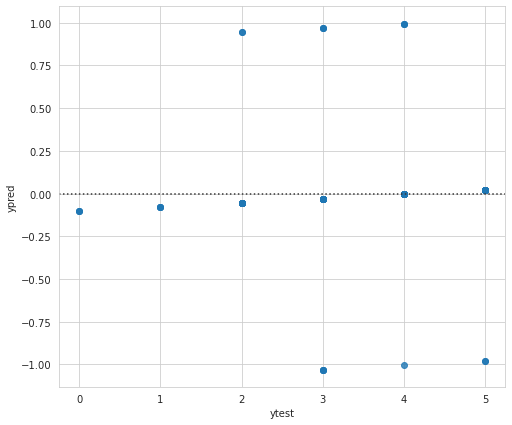

In [33]:
df = pd.DataFrame({ 'ytest':y_test,'ypred':y_pred})
sns.residplot('ytest','ypred',data=df) 

From these figures we see that not all points lie on the line of equality (where `y_test` equals `y_pred` indicating a correct prediction. <br>
This tells us the model is not as accurate as we may like it to be.

Now that we have seen how well our model predicts index values, let us see if the results can compare to the output from using a formula for calculating BMI. <br>
We can compare performance based on accuracy and time complexity.

(IN PROGRESS)